##### FinMan is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across India. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.

## The problem - Who are the best agents?
###### As is obvious in the above process, there is a significant investment which FinMan makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business. 

#### FinMan has shared the details of all the agents they have recruited in 2007 and 2008. The data contained demographics of the agents hired and the managers who hired them.


##### Initially I  Tried LGBM,XG Boost, decision tree, random forest, Extratree. But at the end LGBM Classifier gave me good score . Initially straightaway I used above models by generating age and experience from dates given to the present date which gave me score around 0.6 on leader board. After encoding is done and filling missing values and found a pattern in bussiness sourced  I got score more than 0.8 on the leaderboard.

In [1]:
import csv
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import math
#Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading data
train = pd.read_csv(r"C:\Users\asritha.d\Downloads\train_r7VTVyN_Ko9cGPz.csv")
test = pd.read_csv(r"C:\Users\asritha.d\Downloads\test_ZkjAHF8_2shxaJa_vZtSmPc.csv")
train.shape,test.shape

((9527, 23), (5045, 22))

### EDA

In [3]:
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [4]:
test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [5]:
train.columns,test.columns

(Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
        'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
        'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
        'Manager_Joining_Designation', 'Manager_Current_Designation',
        'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
        'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
        'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
        'Business_Sourced'],
       dtype='object'),
 Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
        'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
        'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
        'Manager_Joining_Designation', 'Manager_Current_Designation',
        'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
        'Manager_Num_Application', 'Man

In [6]:
train.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [7]:
train.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [8]:
train.isnull().mean()*100

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

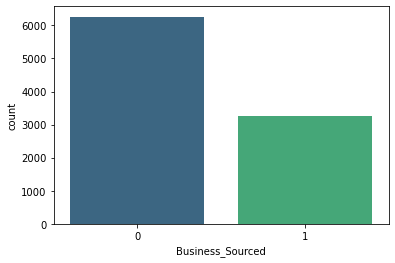

In [9]:
import seaborn as sns
sns.countplot(train["Business_Sourced"],palette="viridis")
plt.show()

In [10]:
train_num_cols = ['Manager_Num_Application', 'Manager_Business','Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2','Manager_Num_Coded']

train_cat_cols = ['Office_PIN','Applicant_City_PIN','Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation', 'Applicant_Qualification','Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender']


In [11]:
train['Office_PIN'].nunique()

98

In [12]:
train['Applicant_City_PIN'].nunique()

2979

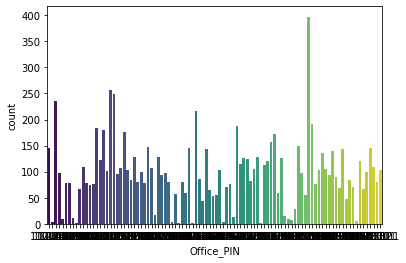

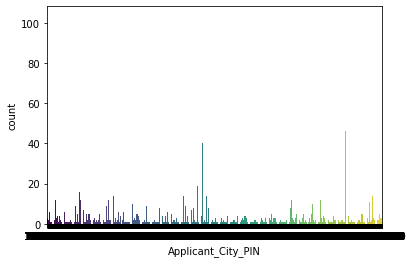

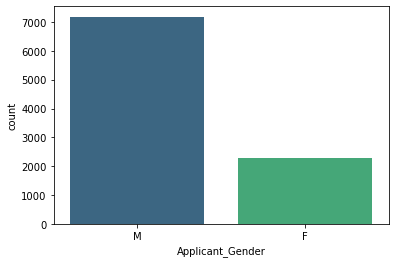

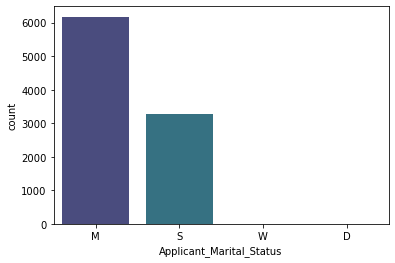

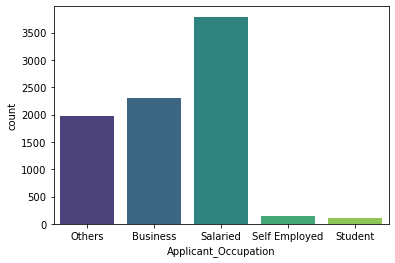

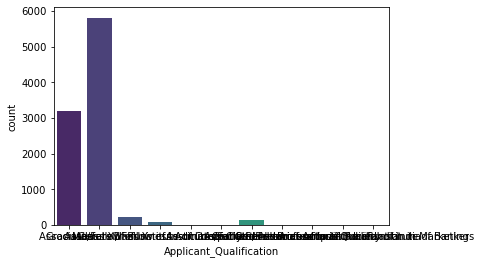

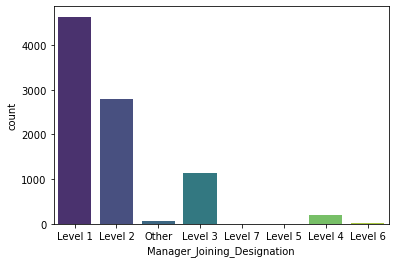

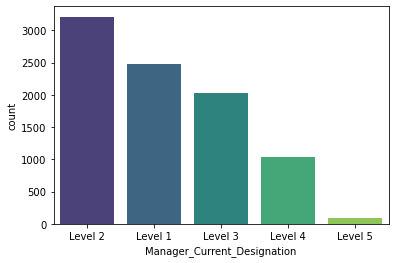

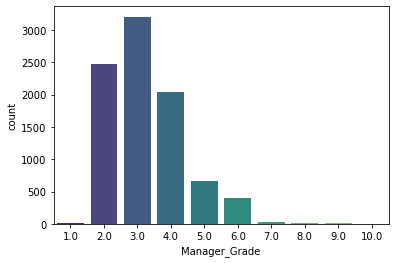

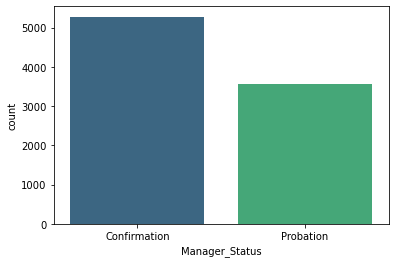

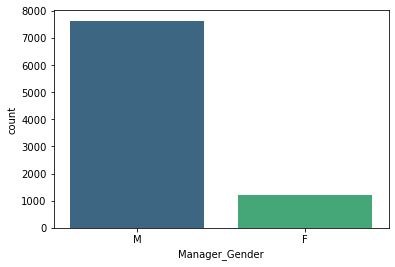

In [13]:
import seaborn as sns
for i in train_cat_cols:
    sns.countplot(train[i],palette="viridis")
    plt.show()

In [14]:
for i in train_cat_cols:
    x=train[i].value_counts()
    print(x)

695014    397
211001    257
221010    249
121002    236
400075    216
         ... 
110034      3
395001      2
144001      2
334002      2
517503      1
Name: Office_PIN, Length: 98, dtype: int64
202001.0    103
492001.0     75
305001.0     64
452001.0     55
476001.0     51
           ... 
804451.0      1
171302.0      1
175006.0      1
813222.0      1
281204.0      1
Name: Applicant_City_PIN, Length: 2979, dtype: int64
M    7179
F    2281
Name: Applicant_Gender, dtype: int64
M    6177
S    3267
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64
Salaried         3787
Business         2303
Others           1966
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64
Class XII                                                           5806
Graduate                                                            3196
Class X                                                              225
Others                                                        

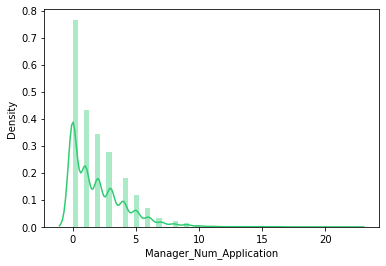

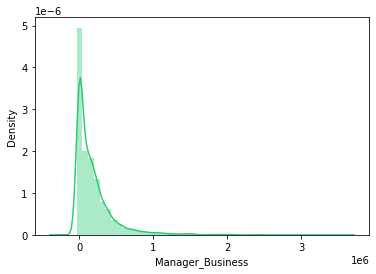

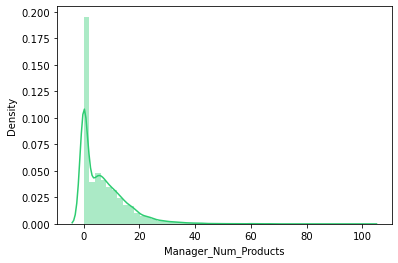

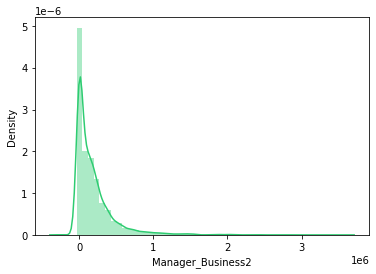

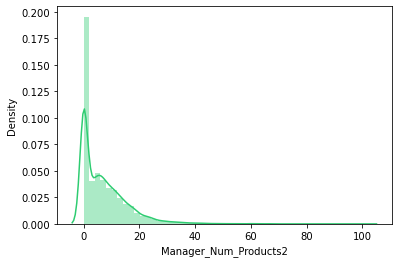

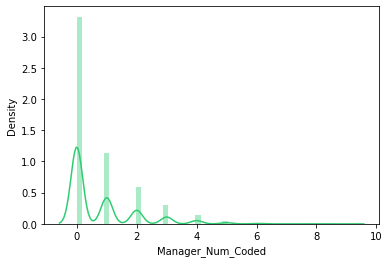

In [15]:
import seaborn as sns
for i in train_num_cols:
    sns.distplot(train[i],color="#2ecc71")
    plt.show()

In [16]:
def UVA_numeric(data, var_group):
 

    size = len(var_group)
    plt.figure(figsize = (6*size,3), dpi = 100)
  
  #looping for each variable
    for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

    # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade=True,color='cyan')
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

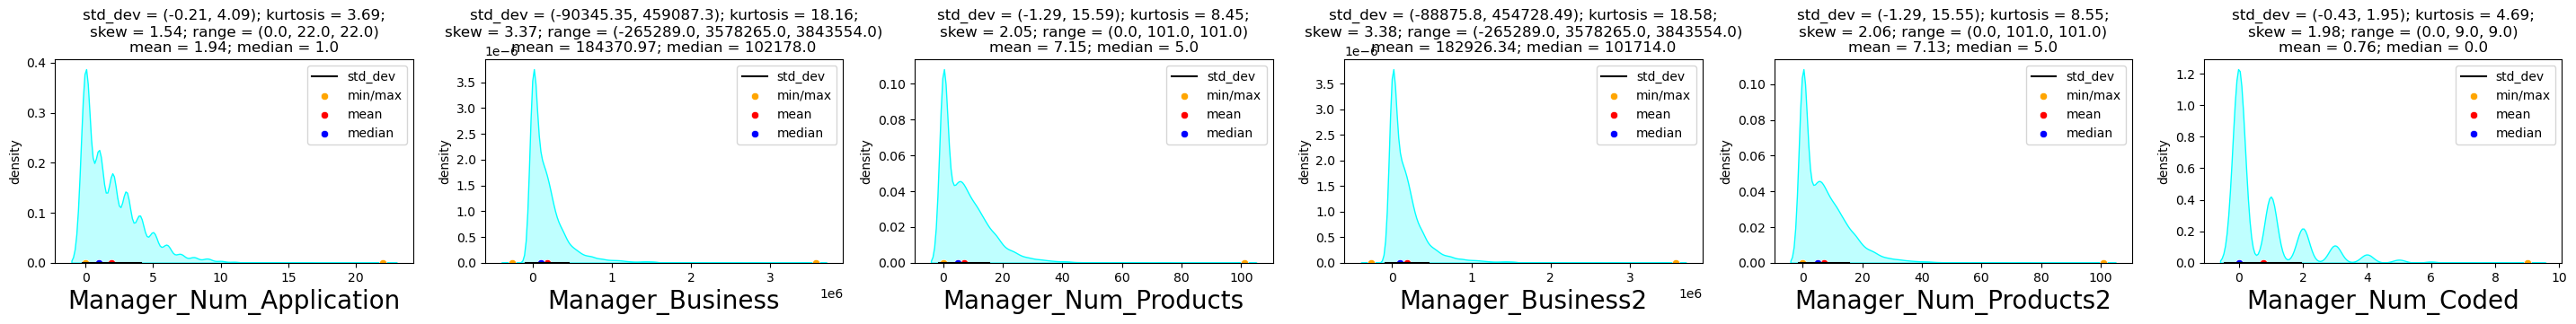

In [17]:
UVA_numeric(train,list(train_num_cols))

###### 1. From this we can observe the data is skewed

<AxesSubplot:>

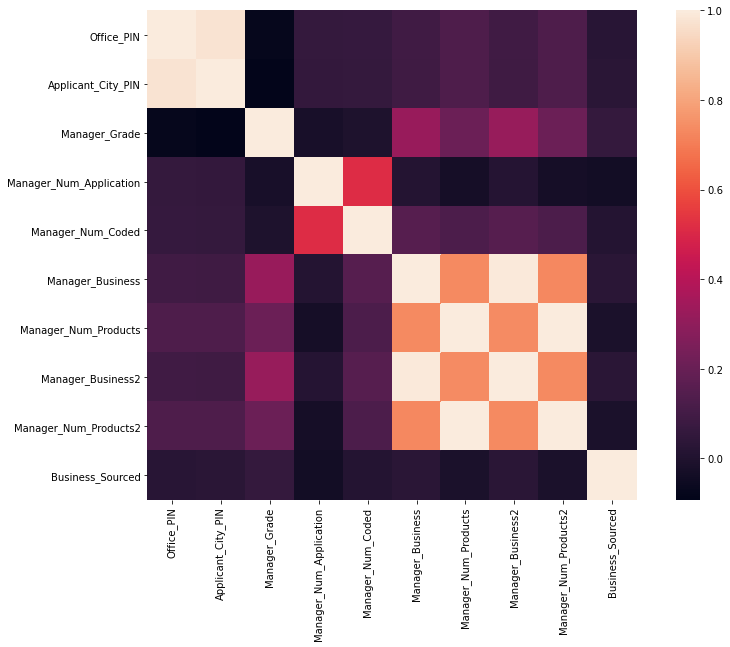

In [18]:
corr = train.corr()                     ## few variables are higly corrlated and few are less correlated 
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr,square= True)

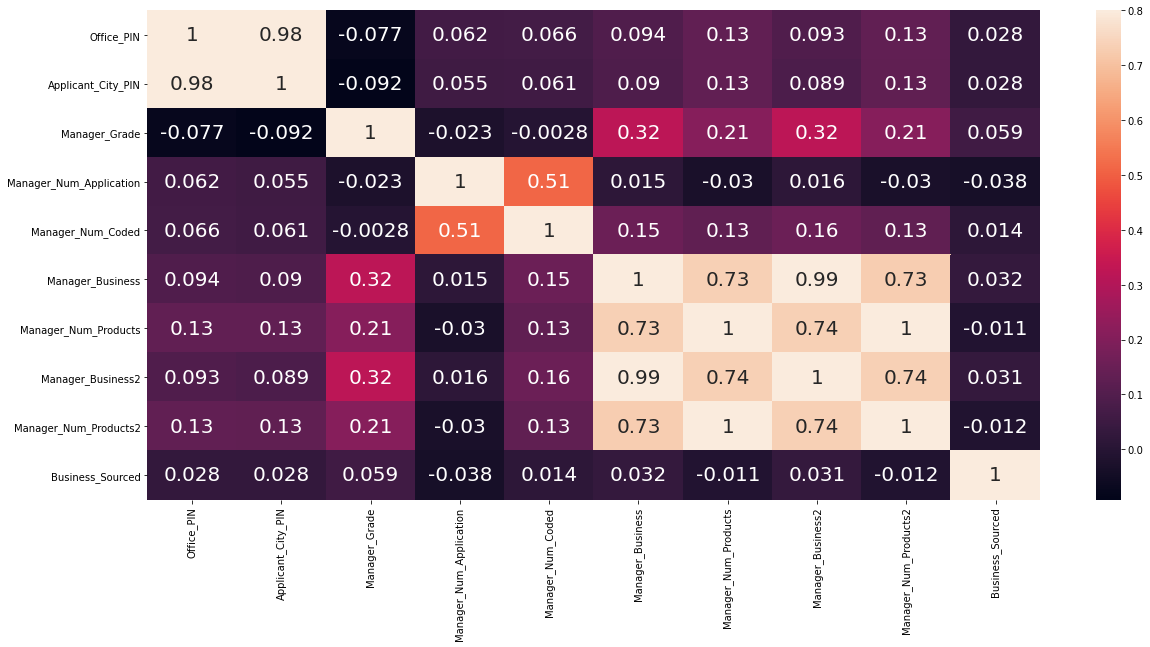

In [19]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr, vmax =.8, annot_kws={'size':20}, annot = True);

In [20]:
#introducing a new coloumn to devide test and train 
train['isTrainDataSet'] = 1
test['isTrainDataSet'] = 0
dataset = train.append(test)

In [21]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,isTrainDataSet
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0.0,1
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0.0,1
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0.0,1
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0.0,1


In [22]:
#formating all the date columns to a proper date-time format
dateColumns = ['Manager_DoB','Manager_DOJ','Applicant_BirthDate','Application_Receipt_Date']
for colName in dateColumns:
    dataset[colName]= pd.to_datetime(dataset[colName])


In [23]:
#creating new features like age and experience from the date coloumns
dataset['applicantAge'] = ((dataset['Application_Receipt_Date']-dataset['Applicant_BirthDate'])/ np.timedelta64(1, 'D'))/365
dataset['managerExperience'] = ((dataset['Application_Receipt_Date']-dataset['Manager_DOJ'])/ np.timedelta64(1, 'D'))/365
dataset['managerAge'] =((dataset['Application_Receipt_Date']-dataset['Manager_DoB'])/ np.timedelta64(1, 'D'))/365


In [24]:
#using map function to encode levels of designation
dataset['Manager_Joining_Designation']=dataset['Manager_Joining_Designation'].map(lambda x:float(str(x)[-1]) if (str(x)[-1]!='n')& (str(x)[-1]!='r') else float('nan'))
dataset['Manager_Current_Designation']=dataset['Manager_Current_Designation'].map(lambda x:float(str(x)[-1]) if (str(x)[-1]!='n')& (str(x)[-1]!='r') else float('nan'))

In [25]:
#this shows if manager is promoted or not
dataset['Manager_Promotion']=dataset['Manager_Current_Designation']-dataset['Manager_Joining_Designation']

In [26]:
dataset.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,isTrainDataSet,applicantAge,managerExperience,managerAge,Manager_Promotion
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,335249.0,28.0,335249.0,28.0,0.0,1,35.347945,1.430137,29.178082,1.0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,335249.0,28.0,335249.0,28.0,1.0,1,24.175342,1.430137,29.178082,1.0
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,357184.0,24.0,357184.0,24.0,0.0,1,41.273973,0.887671,38.145205,0.0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,318356.0,22.0,318356.0,22.0,0.0,1,19.210959,3.654795,28.690411,2.0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,230402.0,17.0,230402.0,17.0,0.0,1,21.797260,0.939726,36.210959,0.0


###### we have created the features for both test and train set 
###### No lets see 

In [27]:
df_train=dataset[dataset['isTrainDataSet'] == 1]
df_train.to_csv("cap_train.csv",index=False)

In [28]:
#we can see no.of application received for a particular date
gp= df_train[['ID','Application_Receipt_Date','Business_Sourced']].groupby(df_train.Application_Receipt_Date)

In [29]:
gp.head()

,ID,Application_Receipt_Date,Business_Sourced
0,FIN1000001,2007-04-16,0.0
1,FIN1000002,2007-04-16,1.0
2,FIN1000003,2007-04-16,0.0
3,FIN1000004,2007-04-16,0.0
4,FIN1000005,2007-04-16,0.0
...,...,...,...
9509,FIN1009510,2008-07-01,1.0
9510,FIN1009511,2008-07-01,1.0
9511,FIN1009512,2008-07-01,1.0
9512,FIN1009513,2008-07-01,1.0


In [30]:
#counting the number of applicants for each date on traindata
ct=gp['ID'].nunique()
ct

Application_Receipt_Date
2007-04-16    79
2007-04-17    26
2007-04-18    86
2007-04-19    31
2007-04-20    35
              ..
2008-06-26    17
2008-06-27    17
2008-06-28    13
2008-06-30    15
2008-07-01    18
Name: ID, Length: 357, dtype: int64

In [31]:
#counting the number of Business_Sourced entries for each date on traindata
srcCnt=gp['Business_Sourced'].sum()
srcCnt

Application_Receipt_Date
2007-04-16    29.0
2007-04-17     8.0
2007-04-18    29.0
2007-04-19     9.0
2007-04-20    11.0
              ... 
2008-06-26     8.0
2008-06-27     7.0
2008-06-28     8.0
2008-06-30     2.0
2008-07-01     5.0
Name: Business_Sourced, Length: 357, dtype: float64

In [32]:
table = pd.pivot_table(df_train[['Business_Sourced']],index=df_train['Application_Receipt_Date'])
table,table['Business_Sourced'].mean()

(                          Business_Sourced
 Application_Receipt_Date                  
 2007-04-16                        0.367089
 2007-04-17                        0.307692
 2007-04-18                        0.337209
 2007-04-19                        0.290323
 2007-04-20                        0.314286
 ...                                    ...
 2008-06-26                        0.470588
 2008-06-27                        0.411765
 2008-06-28                        0.615385
 2008-06-30                        0.133333
 2008-07-01                        0.277778
 
 [357 rows x 1 columns],
 0.3470193397431545)

In [33]:
# Using a ratio of 0.45 considering a buffer of entries with 0 Business_Sourced which comes in the first half everyday
lst=[]
for date in df_train['Application_Receipt_Date'].unique():
    c=ct[date]
    v=int(math.ceil(c*0.45))#we are using 0.45 as it can help us divide the time of application recevied 
    for i in range(v):
        lst.append(1)
    for i in range(c-v):
        lst.append(0)
#this feature makes alot of difference as it divides the applications received to 1st and 2nd half of the day       

In [34]:
df_train['GC']=lst

In [35]:
df_train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,isTrainDataSet,applicantAge,managerExperience,managerAge,Manager_Promotion,GC
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,28.0,335249.0,28.0,0.0,1,35.347945,1.430137,29.178082,1.0,1
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,28.0,335249.0,28.0,1.0,1,24.175342,1.430137,29.178082,1.0,1
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,24.0,357184.0,24.0,0.0,1,41.273973,0.887671,38.145205,0.0,1
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,22.0,318356.0,22.0,0.0,1,19.210959,3.654795,28.690411,2.0,1
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,17.0,230402.0,17.0,0.0,1,21.797260,0.939726,36.210959,0.0,1


In [36]:
df_train['GC'].value_counts()

0    5082
1    4445
Name: GC, dtype: int64

In [37]:
df_test=dataset[dataset['isTrainDataSet'] ==0]

In [38]:
#trying to get the same feature in test set
gp= df_test[['ID','Application_Receipt_Date','Business_Sourced']].groupby(df_test.Application_Receipt_Date)

In [39]:
#counting the number of applicants for each date on test data
ct=gp['ID'].nunique()
ct

Application_Receipt_Date
2008-07-02     10
2008-07-03     24
2008-07-04     32
2008-07-07    120
2008-07-08    116
             ... 
2008-12-27     14
2008-12-29     25
2008-12-30     17
2008-12-31     45
2009-01-01     99
Name: ID, Length: 143, dtype: int64

In [40]:
lst=[]
for date in df_test['Application_Receipt_Date'].unique():
    c=ct[date]
    v=int(math.ceil(c*0.45))
    for i in range(v):
        lst.append(1)
    for i in range(c-v):
        lst.append(0)
df_test['GC']=lst


In [41]:
dataset=df_train.append(df_test)

In [42]:
#this gives us the day of week 
dataset['Day']=dataset['Application_Receipt_Date'].map(lambda x : x.weekday())

In [43]:
#Some more feature engineering
# we drop three coloumns as we creted new features and some of them have high correlatoion
 
columnsToBeDropped = ['Applicant_City_PIN','Applicant_BirthDate','Application_Receipt_Date','Manager_Business2','Manager_DOJ',
                      'Manager_DoB','Manager_Num_Products']
dataset = dataset.drop(columnsToBeDropped,1)

In [44]:
#lets fill the null values
dataset.Applicant_Occupation.fillna("Others",inplace=True)
dataset.Applicant_Occupation.unique()
dataset.Applicant_Marital_Status.fillna("applicantMaritalStatusMissing",inplace=True)
dataset.Applicant_Marital_Status.unique()
dataset.Applicant_Gender.fillna("applicantGenderMissing",inplace=True)
dataset.Applicant_Gender.unique()
dataset.Applicant_Qualification.fillna("Others",inplace=True)
dataset.Applicant_Qualification.unique()
dataset.loc[(dataset['Applicant_Qualification']=='Associate/Fellow of Institute of Company Secretories of India' )
        | (dataset['Applicant_Qualification']==
        'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India'),'Applicant_Qualification'] ='Associate / Fellow of Institute of Chartered Accountans of India'
 
dataset.Manager_Gender.fillna("Manager_GenderMissing",inplace=True)
dataset.Manager_Status.fillna("Manager_StatusMissing",inplace=True)


In [45]:
dataset.head()

,ID,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Business,Manager_Num_Products2,Business_Sourced,isTrainDataSet,applicantAge,managerExperience,managerAge,Manager_Promotion,GC,Day
0,FIN1000001,842001,M,M,Others,Graduate,1.0,2.0,3.0,Confirmation,...,335249.0,28.0,0.0,1,35.347945,1.430137,29.178082,1.0,1,0
1,FIN1000002,842001,M,S,Others,Class XII,1.0,2.0,3.0,Confirmation,...,335249.0,28.0,1.0,1,24.175342,1.430137,29.178082,1.0,1,0
2,FIN1000003,800001,M,M,Business,Class XII,1.0,1.0,2.0,Confirmation,...,357184.0,24.0,0.0,1,41.273973,0.887671,38.145205,0.0,1,0
3,FIN1000004,814112,M,S,Salaried,Class XII,1.0,3.0,4.0,Confirmation,...,318356.0,22.0,0.0,1,19.210959,3.654795,28.690411,2.0,1,0
4,FIN1000005,814112,M,M,Others,Class XII,1.0,1.0,2.0,Confirmation,...,230402.0,17.0,0.0,1,21.797260,0.939726,36.210959,0.0,1,0


In [46]:
cleanup_nums={'Applicant_Gender':{'M':1,'F':0,'applicantGenderMissing':-1},'Manager_Gender':{'M':1,'F':0,'Manager_GenderMissing':-1},'Applicant_Marital_Status':{'applicantMaritalStatusMissing':-1,'S':0,'M':1,'W':2,'D':3},
             'Applicant_Occupation':{'Others':0,'Salaried':1,'Business':2,'Self Employed':3,'Student':4},
             'Applicant_Qualification':{'Others':0,'Class XII':1,'Class X':2,'Graduate':3,'Masters of Business Administration':4,'Associate / Fellow of Institute of Chartered Accountans of India':5,
                                       'Associate/Fellow of Institute of Company Secretories of India':6,'Associate/Fellow of Acturial Society of India':7,'Certified Associateship of Indian Institute of Bankers':8,
                                       'Associate/Fellow of Insurance Institute of India':9,'Professional Qualification in Marketing':10,'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India':11},
              'Manager_Status':{'Manager_StatusMissing':-1,'Probation':0,'Confirmation':1}}

In [47]:
dataset.Manager_Joining_Designation.fillna(0,inplace=True)
dataset.Manager_Current_Designation.fillna(0,inplace=True)
dataset.Manager_Grade.fillna(0,inplace=True)

In [48]:
dataset.replace(cleanup_nums, inplace=True)

In [49]:
dataset.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_Gender                  0
Applicant_Marital_Status          0
Applicant_Occupation              0
Applicant_Qualification           0
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application        1507
Manager_Num_Coded              1507
Manager_Business               1507
Manager_Num_Products2          1507
Business_Sourced               5045
isTrainDataSet                    0
applicantAge                     96
managerExperience              1507
managerAge                     1507
Manager_Promotion              1565
GC                                0
Day                               0
dtype: int64

In [50]:
#i fill the remaining null values with this as they are significantly of low precentage 
df_new=dataset.fillna(-9999)

In [51]:
trainSet=df_new[df_new.isTrainDataSet==1]
trainSet=trainSet.drop(['isTrainDataSet','ID'],1)
trainSet.head()

,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products2,Business_Sourced,applicantAge,managerExperience,managerAge,Manager_Promotion,GC,Day
0,842001,1,1,0,3,1.0,2.0,3.0,1,1,...,1.0,335249.0,28.0,0.0,35.347945,1.430137,29.178082,1.0,1,0
1,842001,1,0,0,1,1.0,2.0,3.0,1,1,...,1.0,335249.0,28.0,1.0,24.175342,1.430137,29.178082,1.0,1,0
2,800001,1,1,2,1,1.0,1.0,2.0,1,1,...,0.0,357184.0,24.0,0.0,41.273973,0.887671,38.145205,0.0,1,0
3,814112,1,0,1,1,1.0,3.0,4.0,1,0,...,0.0,318356.0,22.0,0.0,19.210959,3.654795,28.690411,2.0,1,0
4,814112,1,1,0,1,1.0,1.0,2.0,1,1,...,1.0,230402.0,17.0,0.0,21.797260,0.939726,36.210959,0.0,1,0


In [52]:
X=trainSet.drop(['Business_Sourced'],1)
X1=X[X['GC']==1]
X1.head()

,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products2,applicantAge,managerExperience,managerAge,Manager_Promotion,GC,Day
0,842001,1,1,0,3,1.0,2.0,3.0,1,1,2.0,1.0,335249.0,28.0,35.347945,1.430137,29.178082,1.0,1,0
1,842001,1,0,0,1,1.0,2.0,3.0,1,1,2.0,1.0,335249.0,28.0,24.175342,1.430137,29.178082,1.0,1,0
2,800001,1,1,2,1,1.0,1.0,2.0,1,1,0.0,0.0,357184.0,24.0,41.273973,0.887671,38.145205,0.0,1,0
3,814112,1,0,1,1,1.0,3.0,4.0,1,0,0.0,0.0,318356.0,22.0,19.210959,3.654795,28.690411,2.0,1,0
4,814112,1,1,0,1,1.0,1.0,2.0,1,1,2.0,1.0,230402.0,17.0,21.797260,0.939726,36.210959,0.0,1,0


In [53]:
X0=X[X['GC']==0]
X0.head()

,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products2,applicantAge,managerExperience,managerAge,Manager_Promotion,GC,Day
36,282001,0,0,0,1,2.0,3.0,4.0,1,1,0.0,0.0,286702.0,19.0,69.326027,2.161644,31.246575,1.0,0,0
37,803101,0,0,1,2,1.0,3.0,4.0,1,1,1.0,1.0,295775.0,19.0,18.175342,2.243836,49.901370,2.0,0,0
38,803101,1,0,0,1,1.0,1.0,2.0,1,1,2.0,0.0,194597.0,15.0,19.317808,0.709589,31.293151,0.0,0,0
39,201010,1,1,2,1,2.0,2.0,3.0,1,1,3.0,2.0,347412.0,18.0,27.364384,0.939726,35.002740,0.0,0,0
40,841428,1,0,0,3,1.0,3.0,4.0,1,1,0.0,1.0,853436.0,51.0,22.597260,2.320548,28.791781,2.0,0,0


In [54]:
y1=trainSet['Business_Sourced'][trainSet['GC']==1]
y0=trainSet['Business_Sourced'][trainSet['GC']==0]

In [55]:
testSet=df_new[df_new.isTrainDataSet==0]
testSet=testSet.drop(['isTrainDataSet','ID'],1)
XTest=testSet.drop(['Business_Sourced'],1)
XTest1=XTest[XTest['GC']==1]
XTest0=XTest[XTest['GC']==0]

In [56]:
XTest.head()

,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products2,applicantAge,managerExperience,managerAge,Manager_Promotion,GC,Day
0,284001,1,0,1,3,1.0,1.0,2.0,0,0,1.0,0.0,0.0,0.0,25.926027,0.101370,29.736986,0.0,1,2
1,800001,1,1,1,3,1.0,1.0,2.0,0,1,2.0,0.0,0.0,0.0,40.336986,0.021918,37.358904,0.0,1,2
2,800001,1,0,0,3,0.0,0.0,0.0,-1,-1,-9999.0,-9999.0,-9999.0,-9999.0,23.558904,-9999.000000,-9999.000000,-9999.0,1,2
3,800001,1,0,1,3,0.0,0.0,0.0,-1,-1,-9999.0,-9999.0,-9999.0,-9999.0,37.095890,-9999.000000,-9999.000000,-9999.0,1,2
4,533101,1,0,0,4,2.0,2.0,3.0,1,1,4.0,1.0,97352.0,3.0,29.967123,0.578082,31.046575,0.0,1,2


In [57]:
xc=trainSet.drop(['Business_Sourced'],1)
yc=trainSet['Business_Sourced']

In [58]:
test=XTest.copy()

In [59]:
#defining a function to find fit of the model

def max_accuracy_scr(names,model_c,xc,yc):
    accuracy_scr_max = 0
    roc_scr_max=0
    train_xc,test_xc,train_yc,test_yc = train_test_split(xc,yc,random_state = 42,test_size = 0.2,stratify = yc)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
    if roc_score> roc_scr_max:
      roc_scr_max=roc_score
      final_model = model_c
      mean_acc = cross_val_score(final_model,xc,yc,cv=5,scoring="accuracy").mean()
      std_dev = cross_val_score(final_model,xc,yc,cv=5,scoring="accuracy").std()
      cross_val = cross_val_score(final_model,xc,yc,cv=5,scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max roc score correspond to random state " ,roc_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(f"roc_auc_score: {roc_score}")
    print("*"*50)

In [60]:
accuracy_scr_max = []
models=[]
#accuracy=[]
std_dev=[]
roc_auc=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier()))

for names,model_c in models:
    max_accuracy_scr(names,model_c,xc,yc)

**************************************************
Results for model :  Logistic Regression 
 max roc score correspond to random state  0.48545324422819514 
 Mean accuracy score is :  0.6569749898786261 
 Std deviation score is :  0.0003405827888363453 
 Cross validation scores are :   [0.65687303 0.65634837 0.65721785 0.65721785 0.65721785]
roc_auc_score: 0.48545324422819514
**************************************************
**************************************************
Results for model :  Random Forest 
 max roc score correspond to random state  0.844741990796377 
 Mean accuracy score is :  0.7781052237305592 
 Std deviation score is :  0.0024014864065076973 
 Cross validation scores are :   [0.78279119 0.77911857 0.77480315 0.77952756 0.77480315]
roc_auc_score: 0.844741990796377
**************************************************
**************************************************
Results for model :  Decision Tree Classifier 
 max roc score correspond to random state  0.6856247

In [61]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[1,10,100]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)


Best parameter :  {'n_estimators': 100} 
Best Estimator :  RandomForestClassifier() 
Best Score :  0.8272127156552512


In [62]:
#Again running RFC with n_estimator = 100
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
max_accuracy_scr("RandomForest Classifier",rf_clf,xc,yc)

**************************************************
Results for model :  RandomForest Classifier 
 max roc score correspond to random state  0.8438437338179402 
 Mean accuracy score is :  0.7769508638282755 
 Std deviation score is :  0.004603082451358014 
 Cross validation scores are :   [0.77124869 0.77177335 0.78215223 0.78110236 0.77847769]
roc_auc_score: 0.8438437338179402
**************************************************


In [63]:
xc_train,xc_test,yc_train,yc_test=train_test_split(xc, yc,random_state = 80,test_size=0.20,stratify=yc)
rf_clf.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(test)

In [64]:
pred_pb=rf_clf.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)
auc = roc_auc_score(yc_test,pred_pb)

print(" ROC_AUC score is ",auc)

 ROC_AUC score is  0.8476071313421462


In [65]:
yc_train.head()

3066    0.0
8288    1.0
8374    0.0
489     1.0
8602    0.0
Name: Business_Sourced, dtype: float64

In [66]:
#Trying XGBoost
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight

clf2 = xg.XGBClassifier(class_weight='balanced').fit(xc_train, yc_train)
class_weight.compute_class_weight('balanced', np.unique(yc_train), yc_train)
xg_pred = clf2.predict(xc_test)

[20:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
#XG Boost Results
xg_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,xg_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,xg_pred_2)

print(" ROC_AUC score is ",auc)

 ROC_AUC score is  0.845823440904339


In [68]:
#Trying stratification modeling
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(xc, yc, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(xc, yc)):
        print(f"Fold: {fold}")
        xc_train, yc_train = xc.iloc[train_idx], yc.iloc[train_idx]
        xc_test, yc_test = xc.iloc[test_idx], yc.iloc[test_idx]

        model_c= model(**params)
        model_c.fit(xc_train, yc_train,eval_set=[(xc_test, yc_test)],early_stopping_rounds=100, verbose=300)

        pred_y = model_c.predict_proba(xc_test)[:, 1]
        roc_score = roc_auc_score(yc_test, pred_y)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return model_c

In [69]:
#Applying LGBM Model with 10 stratified cross-folds
from lightgbm import LGBMClassifier

lgb_params= {'learning_rate': 0.045, 'n_estimators': 10000,'max_bin': 84,'num_leaves': 10,'max_depth': 20,'reg_alpha': 8.457,'reg_lambda': 6.853,'subsample': 0.749}
lgb_model = cross_val(xc, yc, LGBMClassifier, lgb_params)

Fold: 0
[300]	valid_0's binary_logloss: 0.430984
roc_auc_score: 0.8572119471231351
--------------------------------------------------
Fold: 1
[300]	valid_0's binary_logloss: 0.42851
[600]	valid_0's binary_logloss: 0.426549
[900]	valid_0's binary_logloss: 0.426548
[1200]	valid_0's binary_logloss: 0.426548
roc_auc_score: 0.8614864534787154
--------------------------------------------------
Fold: 2
[300]	valid_0's binary_logloss: 0.436752
roc_auc_score: 0.8543101679514612
--------------------------------------------------
Fold: 3
[300]	valid_0's binary_logloss: 0.408068
[600]	valid_0's binary_logloss: 0.405379
roc_auc_score: 0.8757168957802074
--------------------------------------------------
Fold: 4
[300]	valid_0's binary_logloss: 0.449385
roc_auc_score: 0.8434358237828649
--------------------------------------------------
Fold: 5
[300]	valid_0's binary_logloss: 0.430539
[600]	valid_0's binary_logloss: 0.42953
roc_auc_score: 0.8593907240769508
-------------------------------------------

In [70]:
df_test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,isTrainDataSet,applicantAge,managerExperience,managerAge,Manager_Promotion,GC
0,FIN1009528,284001,2008-07-02,284001.0,M,1982-08-05,S,Salaried,Graduate,2008-05-26,...,0.0,0.0,0.0,NaN,0,25.926027,0.101370,29.736986,0.0,1
1,FIN1009529,800001,2008-07-02,800026.0,M,1968-03-11,M,Salaried,Graduate,2008-06-24,...,0.0,0.0,0.0,NaN,0,40.336986,0.021918,37.358904,0.0,1
2,FIN1009530,800001,2008-07-02,NaN,M,1984-12-16,S,NaN,Graduate,NaT,...,NaN,NaN,NaN,NaN,0,23.558904,NaN,NaN,NaN,1
3,FIN1009531,800001,2008-07-02,844112.0,M,1971-06-07,S,Salaried,Graduate,NaT,...,NaN,NaN,NaN,NaN,0,37.095890,NaN,NaN,NaN,1
4,FIN1009532,533101,2008-07-02,533102.0,M,1978-07-22,S,NaN,Masters of Business Administration,2007-12-04,...,3.0,97352.0,3.0,NaN,0,29.967123,0.578082,31.046575,0.0,1


In [71]:
df_3=XTest


In [72]:
lead_pred_xg=clf2.predict_proba(df_3)[:,1]
lead_pred_lgb=lgb_model.predict_proba(df_3)[:,1]
lead_pred_rf=rf_clf.predict_proba(df_3)[:,1]
Lead_pred_Ef=clf.predict_proba(df_3)[:,1]
print(lead_pred_xg, lead_pred_lgb, lead_pred_rf,Lead_pred_Ef)

[0.54750204 0.3027383  0.2845776  ... 0.02754079 0.00369428 0.06092234] [0.58695323 0.67238775 0.46514845 ... 0.05884526 0.02240534 0.06716772] [0.6  0.36 0.18 ... 0.04 0.03 0.23] [0.59 0.41 0.21 ... 0.07 0.07 0.08]


In [73]:
#Dataframe for lead prediction
lead_pred_lgb= pd.DataFrame(lead_pred_lgb,columns=["Business_Sourced"])
lead_pred_xg= pd.DataFrame(lead_pred_xg,columns=["Business_Sourced"])
lead_pred_rf= pd.DataFrame(lead_pred_rf,columns=["Business_Sourced"])
Lead_pred_Ef= pd.DataFrame(Lead_pred_Ef,columns=["Business_Sourced"])

In [74]:
#Saving ID  and prediction to csv file for XG Model
df_pred_xg=pd.concat([df_test["ID"],lead_pred_xg],axis=1,ignore_index=True)
df_pred_xg.columns = ["ID","Business_Sourced"]
print(df_pred_xg.head())
df_pred_xg.to_csv("cap_xg.csv",index=False)

#Saving ID  and prediction to csv file for LGB Model
df_pred_lgb=pd.concat([df_test["ID"],lead_pred_lgb],axis=1,ignore_index=True)
df_pred_lgb.columns = ["ID","Business_Sourced"]
print(df_pred_lgb.head())
df_pred_lgb.to_csv("cap_lgb.csv",index=False)

#Saving ID  and prediction to csv file for RF model
df_pred_rf=pd.concat([df_test["ID"],lead_pred_rf],axis=1,ignore_index=True)
df_pred_rf.columns = ["ID","Business_Sourced"]
print(df_pred_rf.head())
df_pred_rf.to_csv("cap_rf.csv",index=False)

#Saving ID  and prediction to csv file for EF model
df_pred_Ef=pd.concat([df_test["ID"],Lead_pred_Ef],axis=1,ignore_index=True)
df_pred_Ef.columns = ["ID","Business_Sourced"]
print(df_pred_Ef.head())
df_pred_Ef.to_csv("cap_Ef.csv",index=False)

           ID  Business_Sourced
0  FIN1009528          0.547502
1  FIN1009529          0.302738
2  FIN1009530          0.284578
3  FIN1009531          0.588027
4  FIN1009532          0.793948
           ID  Business_Sourced
0  FIN1009528          0.586953
1  FIN1009529          0.672388
2  FIN1009530          0.465148
3  FIN1009531          0.577674
4  FIN1009532          0.558161
           ID  Business_Sourced
0  FIN1009528              0.60
1  FIN1009529              0.36
2  FIN1009530              0.18
3  FIN1009531              0.77
4  FIN1009532              0.68
           ID  Business_Sourced
0  FIN1009528              0.59
1  FIN1009529              0.41
2  FIN1009530              0.21
3  FIN1009531              0.78
4  FIN1009532              0.43
